In [1]:
# Import all of the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
from haversine import haversine, Unit

In [2]:
# Importation des CSV
customers = pd.read_csv("olist_customers_dataset.csv")
customers.head()
orders = pd.read_csv("olist_orders_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
geolocations = pd.read_csv("olist_geolocation_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
name_translations = pd.read_csv("product_category_name_translation.csv")

In [3]:
# Merge de tout les tableaux en un grand tableau à 40 colonnes 
data = customers.merge(orders, on = 'customer_id')\
                .merge(items, on = 'order_id')\
                .merge(payments, on = 'order_id')\
                .merge(reviews, on = 'order_id')\
                .merge(products, on = 'product_id')\
                .merge(name_translations, on = 'product_category_name')\
                .merge(sellers, on = 'seller_id')
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,ce2172509c4149d65212484eb761bc37,c5da6424f1f5decedef8672a1a0103e1,88350,brusque,SC,edcf1e1eeb52381be9388c90152be52d,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,...,1002.0,3.0,1900.0,19.0,16.0,16.0,arts_and_craftmanship,95910,lajeado,RS
115605,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,660.0,3.0,500.0,16.0,6.0,16.0,arts_and_craftmanship,17201,jau,SP
115606,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,942.0,5.0,500.0,21.0,7.0,14.0,arts_and_craftmanship,17201,jau,SP
115607,ab0cf72dfe0538a63a57d6905ccb7b57,8c3c961a52bb5a0ffbce1d4e6d25cd67,35930,joao monlevade,MG,2c12150c742ae2fa48bc703964c16c5f,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,...,923.0,5.0,1000.0,25.0,25.0,25.0,arts_and_craftmanship,17201,jau,SP


# Nettoyage des données

.info pour savoir si des données sont manquantes et les types de columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  order_item_id                 

Conversion des types int en objet pour que cela soit plus facile a traiter et des types objet en datetime pour le temps. 

In [5]:
# Conversion du type int en objet 
for feature in ['customer_zip_code_prefix', 'seller_zip_code_prefix']:
    data[feature] = data[feature].astype('object')

In [6]:
# Conversion en type datetime pour le temps en objet
for feature in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date',
                'review_creation_date', 'review_answer_timestamp']:
    data[feature] = pd.to_datetime(data[feature], errors = 'raise', utc = False)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115609 non-null  object        
 1   customer_unique_id             115609 non-null  object        
 2   customer_zip_code_prefix       115609 non-null  object        
 3   customer_city                  115609 non-null  object        
 4   customer_state                 115609 non-null  object        
 5   order_id                       115609 non-null  object        
 6   order_status                   115609 non-null  object        
 7   order_purchase_timestamp       115609 non-null  datetime64[ns]
 8   order_approved_at              115595 non-null  datetime64[ns]
 9   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 10  order_delivered_customer_date  113209 non-null  datetime64[ns]
 11  

.isnull pour les valeurs manquantes et .sum pour toutes les groupées.

In [8]:
data.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             101808


On enlève les colonnes 'review_comment_title' et 'review_comment_message' avec les valeurs manquantes et jugé inutile.

In [9]:
# Remove des donnée null
data.drop(['review_comment_title', 'review_comment_message'], axis = 1, inplace = True)
data.dropna(axis = 0, inplace = True)

In [10]:
data.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_category_name            0
product_name_lenght              0
product_description_

In [11]:
# Etat de ordre
Order_status = data['order_status'].unique().tolist()
Order_status

['delivered', 'canceled']

La suite nous permet de voir les informations pour la livraison. Comme exemple 'min = -189 jours' une livraison arrivé 6 mois après l'estimation.

In [12]:
(data['order_estimated_delivery_date'] - data['order_delivered_customer_date']).describe()

count                        113193
mean     11 days 09:27:35.216532824
std      10 days 02:13:47.261634898
min             -189 days +00:35:53
25%                 6 days 13:09:53
50%                12 days 01:38:16
75%                16 days 07:42:38
max               146 days 00:23:13
dtype: object

<AxesSubplot:ylabel='Frequency'>

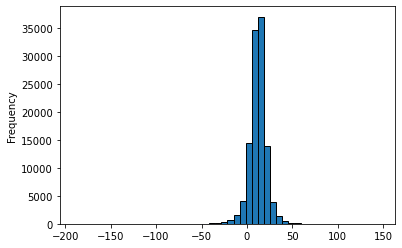

In [13]:
# Temps de livraison moyen entre estimation et réel
((data['order_estimated_delivery_date'] - data['order_delivered_customer_date']) / (np.timedelta64(1, 'D'))).plot(kind='hist', bins=50)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113193 non-null  object        
 1   customer_unique_id             113193 non-null  object        
 2   customer_zip_code_prefix       113193 non-null  object        
 3   customer_city                  113193 non-null  object        
 4   customer_state                 113193 non-null  object        
 5   order_id                       113193 non-null  object        
 6   order_status                   113193 non-null  object        
 7   order_purchase_timestamp       113193 non-null  datetime64[ns]
 8   order_approved_at              113193 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113193 non-null  datetime64[ns]
 10  order_delivered_customer_date  113193 non-null  datetime64[ns]
 11  

In [15]:
#faire une colonne avec temps moyen
data['delivery_accuracy'] = ((data['order_estimated_delivery_date'] - data['order_delivered_customer_date'])/ (np.timedelta64(1, 'D')))

In [16]:
# Colonne total pour achat+frais de livraison
data['total_value'] = data['price'].add(data['freight_value'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113193 non-null  object        
 1   customer_unique_id             113193 non-null  object        
 2   customer_zip_code_prefix       113193 non-null  object        
 3   customer_city                  113193 non-null  object        
 4   customer_state                 113193 non-null  object        
 5   order_id                       113193 non-null  object        
 6   order_status                   113193 non-null  object        
 7   order_purchase_timestamp       113193 non-null  datetime64[ns]
 8   order_approved_at              113193 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113193 non-null  datetime64[ns]
 10  order_delivered_customer_date  113193 non-null  datetime64[ns]
 11  

# VIZU

## Univariée et datacleaning 

In [18]:
# nombre de catégories avec total de items
data['order_item_id'].value_counts().sort_index()

1     99171
2      9895
3      2287
4       943
5       442
6       250
7        60
8        35
9        28
10       25
11       17
12       12
13        7
14        6
15        4
16        2
17        2
18        2
19        2
20        2
21        1
Name: order_item_id, dtype: int64

<AxesSubplot:xlabel='order_item_id'>

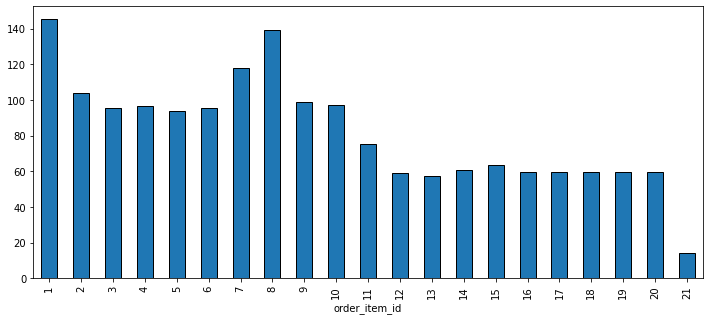

In [19]:
data.groupby('order_item_id')['total_value'].mean().plot(kind='bar',figsize=(12,5))

In [20]:
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,delivery_accuracy,total_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,10.558623,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,20.993171,137.89
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,20.993171,137.89
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,16.587454,140.61
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,21.118750,137.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,ce2172509c4149d65212484eb761bc37,c5da6424f1f5decedef8672a1a0103e1,88350,brusque,SC,edcf1e1eeb52381be9388c90152be52d,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,...,1900.0,19.0,16.0,16.0,arts_and_craftmanship,95910,lajeado,RS,12.453877,314.32
115605,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,500.0,16.0,6.0,16.0,arts_and_craftmanship,17201,jau,SP,9.413773,31.86
115606,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,500.0,21.0,7.0,14.0,arts_and_craftmanship,17201,jau,SP,9.413773,52.77
115607,ab0cf72dfe0538a63a57d6905ccb7b57,8c3c961a52bb5a0ffbce1d4e6d25cd67,35930,joao monlevade,MG,2c12150c742ae2fa48bc703964c16c5f,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,...,1000.0,25.0,25.0,25.0,arts_and_craftmanship,17201,jau,SP,12.259190,77.50


In [21]:
data[['price','freight_value']]

,price,freight_value
0,124.99,21.88
1,112.99,24.90
2,112.99,24.90
3,124.99,15.62
4,106.99,30.59
...,...,...
115604,289.49,24.83
115605,19.00,12.86
115606,39.90,12.87
115607,57.90,19.60


/tmp/ipykernel_16791/1488769294.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



(0.0, 600.0)

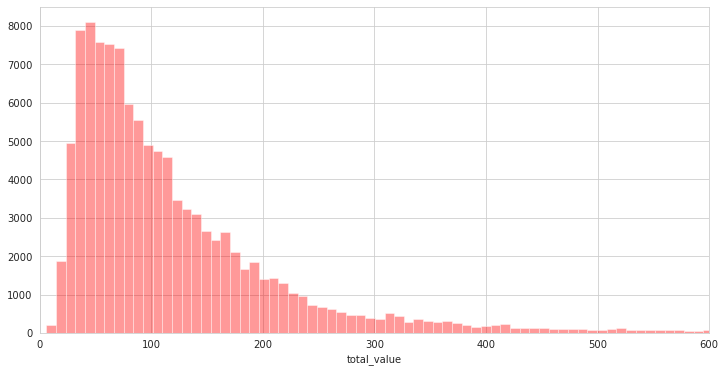

In [22]:
# total ventes
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(data['total_value'], bins=800 ,kde=False, color='r')
plt.xlim([0, 600])

## Variables d'intérets 

## Milestone 4 : analyse multivariée

In [23]:
state_grouped = (data.groupby('customer_state')[['price', 'review_score']]
                             .agg({'review_score': ['mean', 'count'], 'price':['mean']})
                ).sort_values(by=('review_score','mean'), ascending=False)
                 
state_grouped.head()

review_score              price
                       mean  count        mean
customer_state                                
AP                 4.280488     82  164.742805
TO                 4.182371    329  165.744043
SP                 4.180394  47812  109.490344
PR                 4.145078   5790  117.657131
MG                 4.121217  13216  119.443892

<AxesSubplot:title={'center':'Customer/Price/review'}, ylabel='customer_state'>

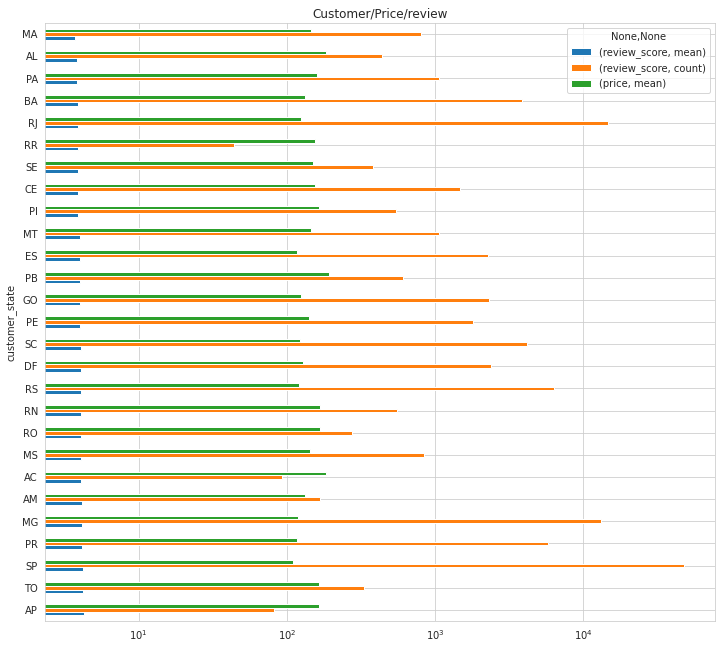

In [24]:
state_grouped.plot(kind='barh', figsize=(12,11), logx=True,title='Customer/Price/review')

<AxesSubplot:title={'center':'Total Volume of Orders in Brazilian Reals Per Month'}, xlabel='order_purchase_timestamp'>

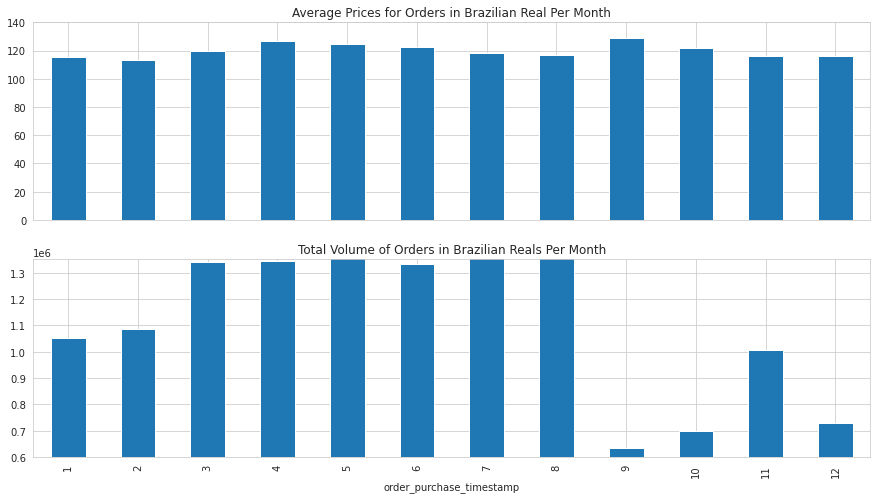

In [25]:
fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(8)
fig.set_figwidth(15)

(data.groupby(data['order_purchase_timestamp'].dt.month)['price'].mean()
      .plot(kind='bar', ax=ax1, ylim=(0,140), 
            title='Average Prices for Orders in Brazilian Real Per Month')
)
(data.groupby(data['order_purchase_timestamp'].dt.month)['price'].sum()
      .plot(kind='bar', ax=ax2, ylim=(600000,1350000), sharex=True,
           title='Total Volume of Orders in Brazilian Reals Per Month')
)

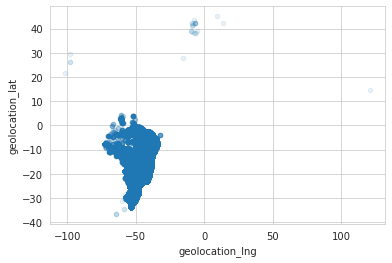

In [26]:
G= geolocations.plot.scatter('geolocation_lng', 'geolocation_lat', alpha=0.1)

In [27]:
#test = data.merge(geolocations,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix', how='left')

In [28]:
#test

In [29]:
G = geolocations

In [30]:
G.drop_duplicates(subset=['geolocation_zip_code_prefix'],inplace=True)

In [31]:
G

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


In [32]:
#test = data.merge(G,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix', how='left')

In [33]:
#test

In [34]:
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,delivery_accuracy,total_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,10.558623,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,20.993171,137.89
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,20.993171,137.89
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,16.587454,140.61
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,21.118750,137.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,ce2172509c4149d65212484eb761bc37,c5da6424f1f5decedef8672a1a0103e1,88350,brusque,SC,edcf1e1eeb52381be9388c90152be52d,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,...,1900.0,19.0,16.0,16.0,arts_and_craftmanship,95910,lajeado,RS,12.453877,314.32
115605,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,500.0,16.0,6.0,16.0,arts_and_craftmanship,17201,jau,SP,9.413773,31.86
115606,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,500.0,21.0,7.0,14.0,arts_and_craftmanship,17201,jau,SP,9.413773,52.77
115607,ab0cf72dfe0538a63a57d6905ccb7b57,8c3c961a52bb5a0ffbce1d4e6d25cd67,35930,joao monlevade,MG,2c12150c742ae2fa48bc703964c16c5f,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,...,1000.0,25.0,25.0,25.0,arts_and_craftmanship,17201,jau,SP,12.259190,77.50


In [35]:
data = data.merge(G,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix', how='left')
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_zip_code_prefix,seller_city,seller_state,delivery_accuracy,total_value,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8577,itaquaquecetuba,SP,10.558623,146.87,14409.0,-20.509897,-47.397866,franca,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8577,itaquaquecetuba,SP,20.993171,137.89,68030.0,-2.442747,-54.728950,santarém,PA
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8577,itaquaquecetuba,SP,20.993171,137.89,68030.0,-2.442747,-54.728950,santarém,PA
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,8577,itaquaquecetuba,SP,16.587454,140.61,92480.0,-29.856534,-51.268958,nova santa rita,RS
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,8577,itaquaquecetuba,SP,21.118750,137.58,25931.0,-22.627556,-43.159942,magé,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113188,ce2172509c4149d65212484eb761bc37,c5da6424f1f5decedef8672a1a0103e1,88350,brusque,SC,edcf1e1eeb52381be9388c90152be52d,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,...,95910,lajeado,RS,12.453877,314.32,88350.0,-27.121007,-48.941164,brusque,SC
113189,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,17201,jau,SP,9.413773,31.86,9951.0,-23.690071,-46.599952,diadema,SP
113190,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,17201,jau,SP,9.413773,52.77,9951.0,-23.690071,-46.599952,diadema,SP
113191,ab0cf72dfe0538a63a57d6905ccb7b57,8c3c961a52bb5a0ffbce1d4e6d25cd67,35930,joao monlevade,MG,2c12150c742ae2fa48bc703964c16c5f,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,...,17201,jau,SP,12.259190,77.50,35930.0,-19.801332,-43.177222,joao monlevade,MG


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 113192
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113193 non-null  object        
 1   customer_unique_id             113193 non-null  object        
 2   customer_zip_code_prefix       113193 non-null  object        
 3   customer_city                  113193 non-null  object        
 4   customer_state                 113193 non-null  object        
 5   order_id                       113193 non-null  object        
 6   order_status                   113193 non-null  object        
 7   order_purchase_timestamp       113193 non-null  datetime64[ns]
 8   order_approved_at              113193 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113193 non-null  datetime64[ns]
 10  order_delivered_customer_date  113193 non-null  datetime64[ns]
 11  

# Création de delai de livraison

In [37]:


### Get the seller zip code of each order
middle = items[['order_id', 'seller_id']]
middle_2 = middle.merge(sellers[['seller_id', 'seller_zip_code_prefix']], on = "seller_id", how = "outer")
orders = orders.merge(middle_2, on = "order_id", how = "left")

### Get customer zip code of each order
orders = orders.merge(customers[['customer_id', 'customer_zip_code_prefix']],
             on = 'customer_id', how = "left")


## add seller coordinates to the orders
orders = orders.merge(G, 
             left_on = "seller_zip_code_prefix", 
             right_on = "geolocation_zip_code_prefix", 
             how = "left")

## add customer coordinates to the orders
orders = orders.merge(G, 
             left_on = "customer_zip_code_prefix", 
             right_on = "geolocation_zip_code_prefix", 
             how = "left",
             suffixes = ("_seller", "_customer"))



In [38]:


## Clean orders
## 1--Filter out orders with multipul sellers
# Because each order only has one delivery date

df = orders.groupby(by="order_id").nunique()

mono_orders = pd.Series(df[df['seller_id'] == 1].index)

filtered_orders = orders.merge(mono_orders, how = 'inner')


## 2--drop rows with missing values
#filtered_orders.isna().sum()
filtered_orders = filtered_orders.drop(columns = ["order_approved_at"])

filtered_orders = filtered_orders.dropna()



In [39]:
## define a function to get distance from coordinates
from math import radians, sin, cos, asin, sqrt
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance between two pairs of (lat, lng)
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    return 2 * 6371 * asin(sqrt(a))

## add distance column to dateset
filtered_orders['distance'] = filtered_orders.apply(
    lambda row: haversine_distance(
        row["geolocation_lng_seller"],
        row["geolocation_lat_seller"],
        row["geolocation_lng_customer"],
        row["geolocation_lat_customer"],
    ),
    axis=1,
)

In [40]:
df_tmp = items[['order_id', 'product_id']].merge(products[['product_id', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_weight_g']],
                                        on = "product_id",
                                        how = "outer")

df_tmp.loc[:, "product_size_cm3"] = df_tmp['product_length_cm'] * df_tmp['product_width_cm'] * df_tmp['product_height_cm']

orders_size_weight = df_tmp.groupby("order_id", as_index = False).sum()[['order_id','product_size_cm3', 'product_weight_g']]

filtered_orders = filtered_orders.merge(orders_size_weight,
                    on = 'order_id',
                    how = 'left')

/tmp/ipykernel_16791/1228370263.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [41]:


## Convert time columns
time_columns = ['order_purchase_timestamp',
                 'order_delivered_customer_date',
                 'order_estimated_delivery_date']

for column in time_columns:
    filtered_orders.loc[:, column] = pd.to_datetime(filtered_orders[column])

filtered_orders.loc[:,"wait_time"] = (filtered_orders['order_delivered_customer_date'] - filtered_orders['order_purchase_timestamp']).dt.days



/tmp/ipykernel_16791/1438782040.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/tmp/ipykernel_16791/1438782040.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/tmp/ipykernel_16791/1438782040.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


In [42]:
filtered_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_zip_code_prefix,customer_zip_code_prefix,...,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,distance,product_size_cm3,product_weight_g,wait_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,3149,...,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,18.063837,1976.0,500.0,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,289cdb325fb7e7f891c38608bf9e0962,31570.0,47813,...,MG,47813.0,-12.169860,-44.988369,barreiras,BA,856.292580,4693.0,400.0,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,4869f7a5dfa277a7dca6462dcf3b52b2,14840.0,75265,...,SP,75265.0,-16.746337,-48.514624,vianopolis,GO,514.130333,9576.0,420.0,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,66922902710d126a0e7d26b0e3805106,31842.0,59296,...,MG,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN,1822.800366,6000.0,450.0,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2c9e548be18521d1c43cde1c582c6de8,8752.0,9195,...,SP,9195.0,-23.675037,-46.524784,santo andre,SP,30.174037,11475.0,250.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106573,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1f9ab4708f3056ede07124aad39a2554,17602.0,11722,...,SP,11722.0,-24.001467,-46.446355,praia grande,SP,474.098245,16000.0,4950.0,22
106574,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,d50d79cb34e38265a8649c383dcffd48,8290.0,45920,...,SP,45920.0,-17.891522,-39.370942,nova vicosa,BA,968.051192,63360.0,13300.0,24
106575,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,a1043bafd471dff536d0c462352beb48,37175.0,28685,...,MG,28685.0,-22.555985,-42.690761,japuiba,RJ,370.146853,16000.0,13100.0,17
106576,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,a1043bafd471dff536d0c462352beb48,37175.0,28685,...,MG,28685.0,-22.555985,-42.690761,japuiba,RJ,370.146853,16000.0,13100.0,17


In [43]:
filtered_orders.describe()

,seller_zip_code_prefix,customer_zip_code_prefix,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,distance,product_size_cm3,product_weight_g,wait_time
count,106578.000000,106578.000000,106578.000000,106578.000000,106578.000000,106578.000000,106578.000000,106578.000000,106578.000000,1.065780e+05,106578.000000,106578.000000
mean,24452.317270,35107.453658,24452.317270,-22.799688,-47.229684,35107.453658,-21.229338,-46.207002,597.877717,2.089869e+04,2839.245417,12.097074
std,27624.542174,29866.845926,27624.542174,2.716084,2.343765,29866.845926,5.587930,4.054689,592.781228,4.359780e+04,6704.404425,9.518642
min,1001.000000,1003.000000,1001.000000,-36.605374,-64.283946,1003.000000,-36.605374,-72.666706,0.000000,0.000000e+00,0.000000,0.000000
25%,6429.000000,11310.000000,6429.000000,-23.612053,-48.812471,11310.000000,-23.590818,-48.125260,182.260661,3.136000e+03,335.000000,6.000000
50%,13503.000000,24315.000000,13503.000000,-23.425946,-46.743493,24315.000000,-22.929835,-46.633100,432.348581,8.000000e+03,820.000000,10.000000
75%,27972.000000,58840.000000,27972.000000,-21.766477,-46.518082,58840.000000,-20.180875,-43.659629,793.222821,2.199900e+04,2400.000000,15.000000
max,99730.000000,99980.000000,99730.000000,-2.546079,-34.847856,99980.000000,42.184003,-8.577855,8736.947618,1.476000e+06,184400.000000,209.000000


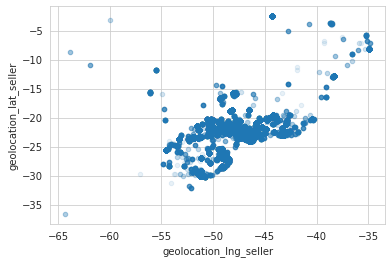

In [44]:
GS= filtered_orders.plot.scatter('geolocation_lng_seller', 'geolocation_lat_seller', alpha=0.1)

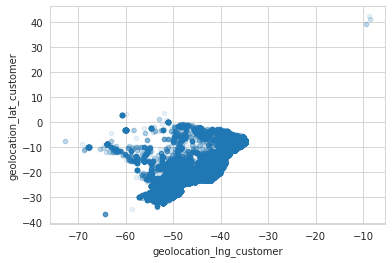

In [45]:
GC= filtered_orders.plot.scatter('geolocation_lng_customer', 'geolocation_lat_customer', alpha=0.1)

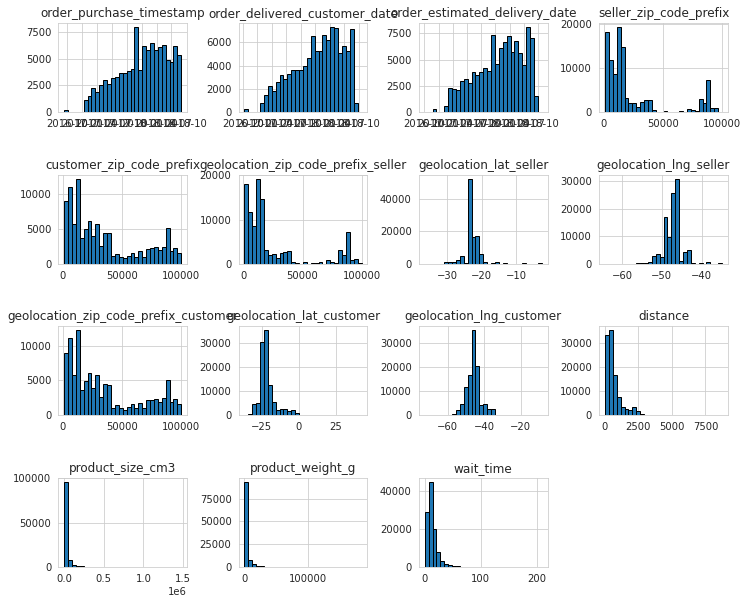

In [46]:
# Let’s have a quick look at the distribution of these features by plotting their histograms
filtered_orders.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

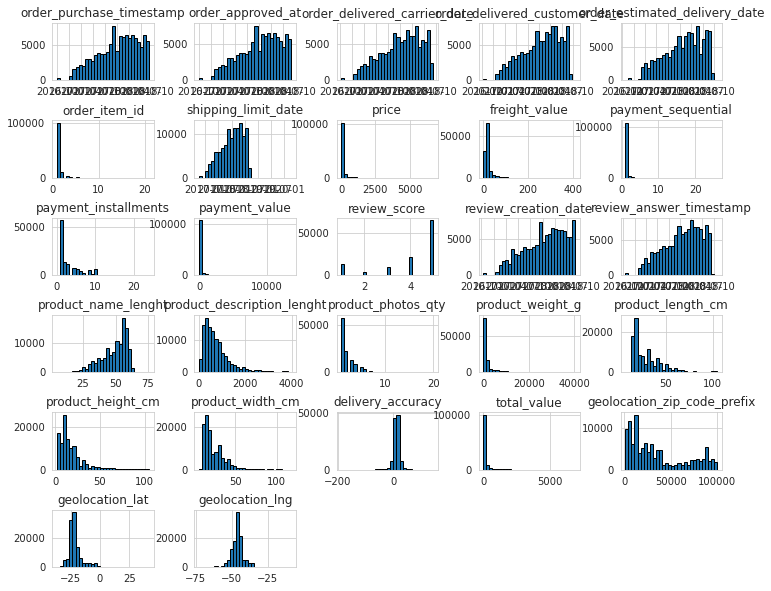

In [47]:
data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)